# Case Study: Predict the daily amount spend of campaigns 
Prepared by Zainab Hodroj

## **Overview**

Many companies would benefit immensely by investigating the amount spent on campaigns and taking steps to improve it. Let's look at how we can develop this intelligence using machine learning.

##About The Data 

The data includes different objectives and KPIs like reach, impressions, clicks, etc...Our goal is to find the most important variables related to the amount spent and creat an ML rool that will help in accuratly predicting the amount spent.


## Importing the Libraries

In [1238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn import model_selection, metrics  #to include metrics for evaluation # this used to be cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
%matplotlib inline

In [1239]:
# Quiet warnings (it quiets future and deprecation warnings).
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Data Cleaning

In [1240]:
# Read the data and view it.
data=pd.read_csv('ML_Prediction.csv')
data.head()

,Reporting starts,Reporting ends,Campaign name,Reach,Impressions,Link clicks,Landing page views,Post engagement,3-second video plays,ThruPlays,Post comments,Post saves,Post reactions,Post shares,Video plays at 50%,Leads,Amount Spent
0,31/12/2021,31/12/2021,0016_CPE_Egypt_Dec'21,82607,108515,5.0,NaN,3671.0,NaN,NaN,31.0,7.0,2601.0,20.0,NaN,NaN,442.86
1,31/12/2021,31/12/2021,0016_Egypt_CPC_Dec'21,63441,68432,51.0,6.0,3490.0,3397.0,325.0,NaN,3.0,39.0,NaN,565.0,NaN,94.85
2,31/12/2021,31/12/2021,0016_CPLPV_Egypt_Dec'21,16064,16850,28.0,17.0,50.0,NaN,NaN,1.0,1.0,17.0,3.0,NaN,NaN,72.30
3,31/12/2021,31/12/2021,0016_Egypt_Remarketing_Dec'21,18664,21406,12.0,1.0,19.0,NaN,NaN,2.0,NaN,5.0,NaN,NaN,NaN,43.62
4,31/12/2021,31/12/2021,0016_CPC_KSA_Dec'21,159934,166541,268.0,105.0,355.0,NaN,NaN,NaN,13.0,58.0,16.0,NaN,NaN,771.16


In [1241]:
# See if the data info.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35770 entries, 0 to 35769
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Reporting starts      35770 non-null  object 
 1   Reporting ends        35770 non-null  object 
 2   Campaign name         35770 non-null  object 
 3   Reach                 35770 non-null  int64  
 4   Impressions           35770 non-null  int64  
 5   Link clicks           2321 non-null   float64
 6   Landing page views    2042 non-null   float64
 7   Post engagement       2198 non-null   float64
 8   3-second video plays  1053 non-null   float64
 9   ThruPlays             1052 non-null   float64
 10  Post comments         1554 non-null   float64
 11  Post saves            1466 non-null   float64
 12  Post reactions        2164 non-null   float64
 13  Post shares           1150 non-null   float64
 14  Video plays at 50%    1052 non-null   float64
 15  Leads              

In [1242]:
#null values
data.isnull().any()

Reporting starts        False
Reporting ends          False
Campaign name           False
Reach                   False
Impressions             False
Link clicks              True
Landing page views       True
Post engagement          True
3-second video plays     True
ThruPlays                True
Post comments            True
Post saves               True
Post reactions           True
Post shares              True
Video plays at 50%       True
Leads                    True
Amount Spent            False
dtype: bool

In [1243]:
#dropping all null values in the target variable
data = data[data["Amount Spent"] != 0.0]

In [1244]:
# See how many rows and columns.
data.shape

(2342, 17)

In [1245]:
data['Campaign name'].values

array(["0016_CPE_Egypt_Dec'21", "0016_Egypt_CPC_Dec'21",
       "0016_CPLPV_Egypt_Dec'21", ..., "0016_PL_CPL_Egypt_Jan'21",
       "0016_PL_CPE_Egypt_Jan'21", "0016_PL_CPE_Egypt_Jan'21"],
      dtype=object)

In [1246]:
data['Campaign name'] = data['Campaign name'].astype(str)


In [1247]:
data[['ID','Objective',"Country","Date2","5",'6']] = data['Campaign name'].str.split("_", expand=True)


In [1248]:
data["ID"].value_counts()

0016    2342
Name: ID, dtype: int64

In [1249]:
data["Objective"].value_counts()

L              678
Egypt          460
CPMR           385
CPLPV          294
CPC            132
CPE            125
CPA            120
Remarketing     74
PL              38
Awareness       20
CPV             16
Name: Objective, dtype: int64

In [1250]:
data["Country"].value_counts()

Egypt          379
CPC            314
Qatar          297
KSA            266
CPA            246
CPL            200
CPE            168
CPMR           168
Remarketing    123
Auction         83
UAE             63
UAE             24
ND               7
R&F              4
Name: Country, dtype: int64

In [1251]:
data["5"].value_counts()

Feb'21              122
Mar'21              113
June'21             112
July'21             109
Oct'21              109
April'21             99
Dec'21               93
May'21               91
Nov'21               84
Sept'21              55
SignUps              50
LPV                  46
Jan'21               38
Egypt                26
Orders               24
Copy                 24
JulyAugSepOct'21     20
Aug'21                8
Sep'21                7
July'21 – Copy        6
Name: 5, dtype: int64

In [1252]:
data["6"].value_counts()


May'21              26
01                  25
JulyAugSepOct'21    24
ABTest              23
02                  23
Name: 6, dtype: int64

In [1253]:
data['Reporting starts'].equals(data['Reporting ends'])


True

In [1254]:
#Dropping the columns that are not needed for the analysis and renaming Reporting starts and Reporting starts to Date
data = data.rename(columns={'Reporting starts': 'Date'})
data.drop(['Reporting ends', '6'], axis = 1, inplace = True) 


In [1255]:
data["Leads"].isna().sum()

1713

In [1256]:
#choose Egypt Qatar KSA UAE in the country/Objective/Date column and place them in a new column
data['Country2'] = np.where(data['Country'] == 'Egypt', 'Egypt', np.where(data['Country'] == 'Qatar', 'Qatar', np.where(data['Country'] == 'KSA', 'KSA', np.where(data['Country'] == 'UAE', 'UAE', 'na'))))
data["Country3"] = np.where(data["Objective"] == 'Egypt', 'Egypt', np.where(data["Objective"] == 'Qatar', 'Qatar', np.where(data["Objective"] == 'KSA', 'KSA', np.where(data["Objective"] == 'UAE', 'UAE', 'na'))))
data["Country4"] = np.where(data["Date2"] == 'Egypt', 'Egypt', np.where(data["Date2"] == 'Qatar', 'Qatar', np.where(data["Date2"] == 'KSA', 'KSA', np.where(data["Date2"] == 'UAE', 'UAE', 'na'))))
data["Country5"] = np.where(data['5'] == 'Egypt', 'Egypt', np.where(data['5'] == 'Qatar', 'Qatar', np.where(data['5'] == 'KSA', 'KSA', np.where(data['5'] == 'UAE', 'UAE', 'na'))))


In [1257]:
data["Country4"].value_counts()

na       1515
Egypt     777
KSA        30
UAE        20
Name: Country4, dtype: int64

In [1258]:
data['Country3'].equals(data['Country2'])


False

In [1259]:
#Country 4 contains all the countries that are in the data set
data['Country2'] = np.where(data['Country2'] == "na", data['Country3'], data['Country2'])
data['Country3'] = np.where(data['Country3'] == "na", data['Country2'], data['Country3'])
data['Country4'] = np.where(data['Country4'] == "na", data['Country3'], data['Country4'])
data["Country5"] = np.where(data["Country5"] == "na", data['Country4'], data['Country5'])


In [1260]:
data["Country5"].value_counts() 

Egypt    1642
Qatar     297
KSA       296
UAE        83
na         24
Name: Country5, dtype: int64

In [1261]:
data["Date2"].value_counts()

Egypt                777
May'21               297
Sept'21              182
Aug'21               177
Dec'21               176
Oct'21               152
Nov'21               144
PreOrder             122
CRM                  109
JulyAugSepOct'21      56
July'21               31
KSA                   30
ABTest                26
Conversions           24
UAE                   20
JulyAugSeptOct'21      7
ND                     7
June'21                4
Conversion             1
Name: Date2, dtype: int64

In [1262]:
#drop country2, 3, and 4 columns
data.drop(['Country2', 'Country3', 'Country5'], axis = 1, inplace = True)

In [1263]:
#choose CPC, CPMR, CPV, CPM, CPL, CPA, CPLPV in the country/Objective/Date column and place them in a new column
data['Objective1'] = np.where(data['Country'] == 'CPC', 'CPC', np.where(data['Country'] == 'CPMR', 'CPMR', np.where(data['Country'] =='CPV', 'CPV' , np.where(data['Country'] == 'CPM', 'CPM', np.where(data['Country'] == 'CPM', 'CPM', np.where(data['Country'] == 'CPL', 'CPL',np.where(data['Country'] == 'CPA', 'CPA', np.where(data['Country'] == 'CPLPV', 'CPLPV',np.where(data['Country'] == 'CPE', 'CPE',  np.where(data['Country'] == 'Remarketing', 'Remarketing', 'na'))))))))))
data['Objective2'] = np.where(data['Objective'] == 'CPC', 'CPC',  np.where(data['Objective'] == 'CPMR', 'CPMR', np.where(data['Objective'] =='CPV', 'CPV' , np.where(data['Objective'] == 'CPM', 'CPM', np.where(data['Objective'] == 'CPM', 'CPM', np.where(data['Objective'] == 'CPL', 'CPL',np.where(data['Objective'] == 'CPA', 'CPA', np.where(data['Objective'] == 'CPLPV', 'CPLPV',np.where(data['Objective'] == 'CPE', 'CPE', np.where(data['Objective'] == 'Remarketing', 'Remarketing', 'na'))))))))))

In [1264]:
data['Objective1'] = np.where(data['Objective1'] == "na", data['Objective2'], data['Objective1'])
#data['Objective2'] = np.where(data['Objective2'] == "na", data['Objective1'], data['Objective2'])

In [1265]:
data.shape

(2342, 24)

In [1266]:
data["Objective1"].value_counts()

CPMR           553
CPC            446
CPA            366
CPLPV          294
CPE            293
CPL            200
Remarketing    174
CPV             16
Name: Objective1, dtype: int64

In [1267]:
#drop objective1 and ID columns
data.drop(['Objective2', 'ID'], axis = 1, inplace = True)

In [1268]:
data.head()

,Date,Campaign name,Reach,Impressions,Link clicks,Landing page views,Post engagement,3-second video plays,ThruPlays,Post comments,...,Post shares,Video plays at 50%,Leads,Amount Spent,Objective,Country,Date2,5,Country4,Objective1
0,31/12/2021,0016_CPE_Egypt_Dec'21,82607,108515,5.0,NaN,3671.0,NaN,NaN,31.0,...,20.0,NaN,NaN,442.86,CPE,Egypt,Dec'21,None,Egypt,CPE
1,31/12/2021,0016_Egypt_CPC_Dec'21,63441,68432,51.0,6.0,3490.0,3397.0,325.0,NaN,...,NaN,565.0,NaN,94.85,Egypt,CPC,Dec'21,None,Egypt,CPC
2,31/12/2021,0016_CPLPV_Egypt_Dec'21,16064,16850,28.0,17.0,50.0,NaN,NaN,1.0,...,3.0,NaN,NaN,72.30,CPLPV,Egypt,Dec'21,None,Egypt,CPLPV
3,31/12/2021,0016_Egypt_Remarketing_Dec'21,18664,21406,12.0,1.0,19.0,NaN,NaN,2.0,...,NaN,NaN,NaN,43.62,Egypt,Remarketing,Dec'21,None,Egypt,Remarketing
4,31/12/2021,0016_CPC_KSA_Dec'21,159934,166541,268.0,105.0,355.0,NaN,NaN,NaN,...,16.0,NaN,NaN,771.16,CPC,KSA,Dec'21,None,KSA,CPC


In [1269]:
#data["Country3"].replace({"na": data["Country2"]}, inplace=True)
#data['Country3']= data['type'].apply(lambda x: 'na' if (x == data['Country2']) else x)
#data['Country3'].value_counts()

#data.head()


In [1270]:
#data["Country2"].isnull().sum()
#pd.isnull(data["Country2"]).sum()

In [1271]:
#fill nan in the country3 column with the most common value
#data["Country3"] = data["Country3"].fillna("2")
#str(data["Country3"])
#data["Country3"]= data["Country3"].fillna(data["Country2"])
#data["Country2"]= data["Country2"].fillna(data["Country3"])


In [1272]:
#combine two columns to one column with no NAN values
#data["Country3"]= data["Country3"].fillna(data["Country2"])
# remove the NAN values with blank space
#data["Country2"] = data["Country2"].replace(np.nan, '1')
#data['Country3'] = data['Country3'].replace(np.nan, '2')

#data['Country3'].NAN.fill().show()
#data.na.fill({'Country3': ""}).show()


#data['Country3']. replace(np.na,'',regex=True)
#data['Country']. replace(np. NAN,'',regex=True)

#data['Country3']= data['Country3'].fillna('') + data['Country2'].fillna('')
#data[['Country2','Country3']] = data[['Country2','Country3']]. fillna('1')
#df1 = data['Country3'].replace(np.nan, '', regex=True)
#data['Country3'].fillna('1', inplace=True)
#data["Country4"] =data['Country3'].fillna(data['Country3']) + data['Country2'].fillna(data['Country2'])
#data["Country3"].bfill(axis=1).iloc[:, 0]




Let's look at relationships between customer data and churn using correlation.

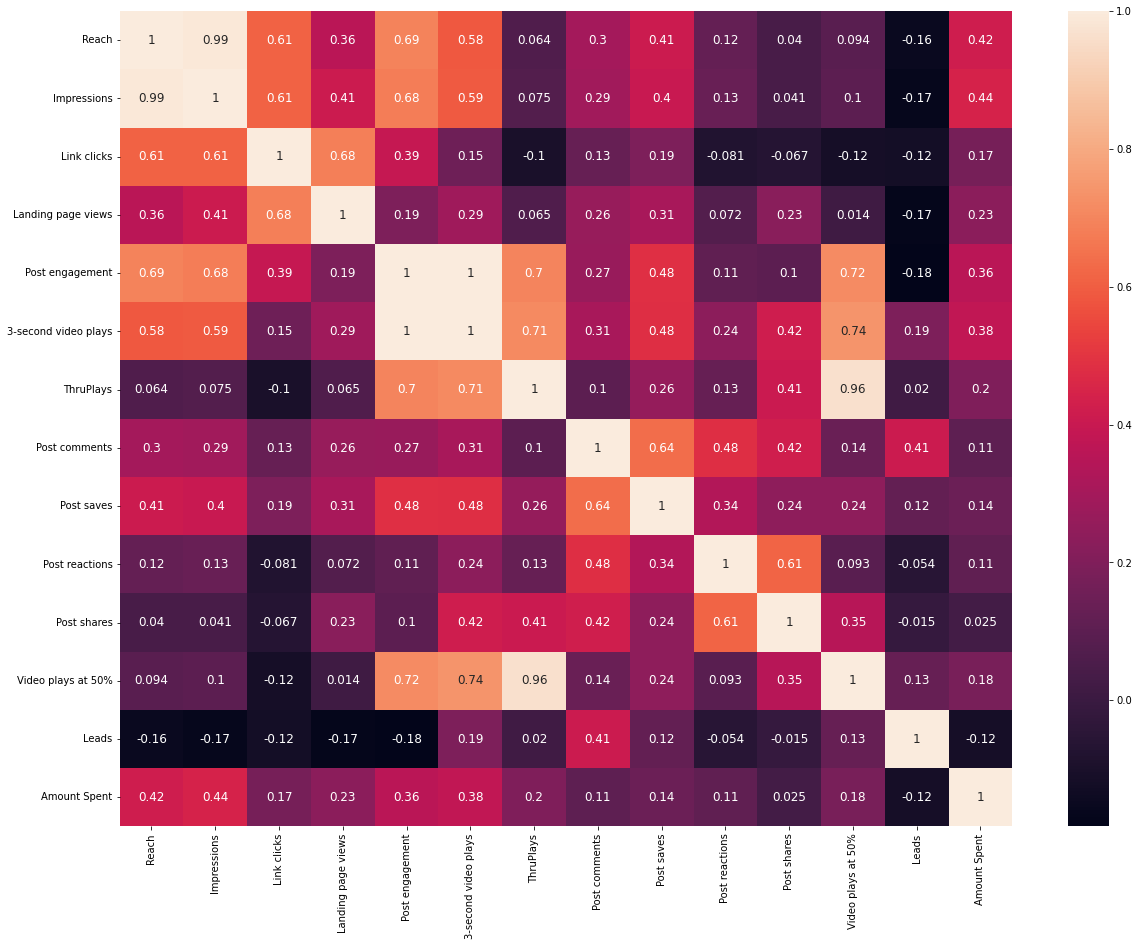

In [1273]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Our goal is to avoid multicollinearity by dropping features that are closely correlated with each other. For example here it is TotalCharges and MonthlyCharges. So we will drop TotalCharges.

In [1274]:
# Run info again to make sure TotalCharges has been dropped (popped off).
data.isnull().sum().sort_values(ascending=False)


Leads                   1713
ThruPlays               1290
Video plays at 50%      1290
3-second video plays    1289
Post shares             1192
5                       1106
Post saves               876
Post comments            788
Landing page views       317
Post reactions           178
Post engagement          144
Link clicks               21
Objective                  0
Country4                   0
Date2                      0
Country                    0
Date                       0
Amount Spent               0
Campaign name              0
Impressions                0
Reach                      0
Objective1                 0
dtype: int64

## 5: Explore The Data 

In [1275]:
# Explore data points we have.
print(len(data['Amount Spent']))

2342


In [1276]:
# Explore how many customers in this dataset have churned. Is this dataset 50% as the team suggests is the overall customer churn rate?  
data['Objective'].value_counts()
# We see this dataset actually has less than the overall 50% churn rate of the entire company reported data (it's actually 26.54% that have churned.

L              678
Egypt          460
CPMR           385
CPLPV          294
CPC            132
CPE            125
CPA            120
Remarketing     74
PL              38
Awareness       20
CPV             16
Name: Objective, dtype: int64

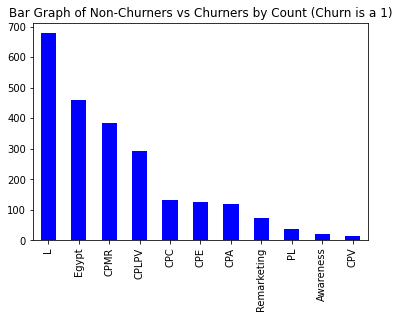

In [1277]:
# This creates a bar graph of churn (Yes vs. No) so we can check how the data is balanced.
data['Objective'].value_counts().plot(kind = 'bar', title = 'Bar Graph of Non-Churners vs Churners by Count (Churn is a 1)', color = 'blue', align = 'center')
plt.show()
# The dataset does not have a huge imbalance which is good news! But also we clearly see it does not have the 50% as we would have thought. 

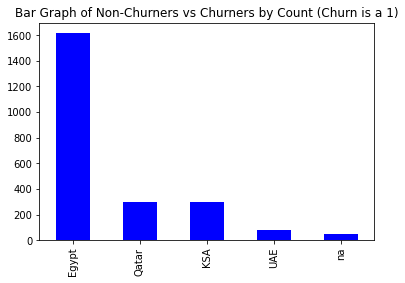

In [1278]:
# This creates a bar graph of churn (Yes vs. No) so we can check how the data is balanced.
data['Country4'].value_counts().plot(kind = 'bar', title = 'Bar Graph of Non-Churners vs Churners by Count (Churn is a 1)', color = 'blue', align = 'center')
plt.show()
# The dataset does not have a huge imbalance which is good news! But also we clearly see it does not have the 50% as we would have thought. 

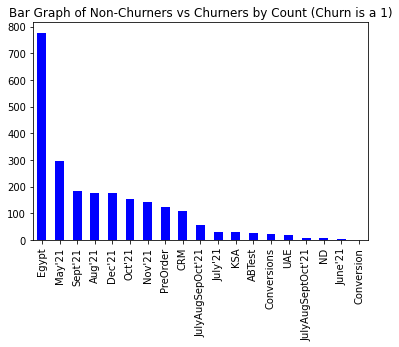

In [1279]:
# This creates a bar graph of churn (Yes vs. No) so we can check how the data is balanced.
data['Date2'].value_counts().plot(kind = 'bar', title = 'Bar Graph of Non-Churners vs Churners by Count (Churn is a 1)', color = 'blue', align = 'center')
plt.show()
# The dataset does not have a huge imbalance which is good news! But also we clearly see it does not have the 50% as we would have thought. 

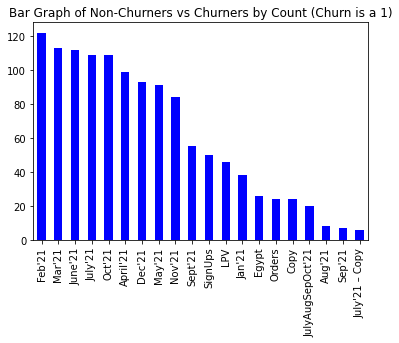

In [1280]:
# This creates a bar graph of churn (Yes vs. No) so we can check how the data is balanced.
data['5'].value_counts().plot(kind = 'bar', title = 'Bar Graph of Non-Churners vs Churners by Count (Churn is a 1)', color = 'blue', align = 'center')
plt.show()
# The dataset does not have a huge imbalance which is good news! But also we clearly see it does not have the 50% as we would have thought. 

In [1281]:
data.head()

,Date,Campaign name,Reach,Impressions,Link clicks,Landing page views,Post engagement,3-second video plays,ThruPlays,Post comments,...,Post shares,Video plays at 50%,Leads,Amount Spent,Objective,Country,Date2,5,Country4,Objective1
0,31/12/2021,0016_CPE_Egypt_Dec'21,82607,108515,5.0,NaN,3671.0,NaN,NaN,31.0,...,20.0,NaN,NaN,442.86,CPE,Egypt,Dec'21,None,Egypt,CPE
1,31/12/2021,0016_Egypt_CPC_Dec'21,63441,68432,51.0,6.0,3490.0,3397.0,325.0,NaN,...,NaN,565.0,NaN,94.85,Egypt,CPC,Dec'21,None,Egypt,CPC
2,31/12/2021,0016_CPLPV_Egypt_Dec'21,16064,16850,28.0,17.0,50.0,NaN,NaN,1.0,...,3.0,NaN,NaN,72.30,CPLPV,Egypt,Dec'21,None,Egypt,CPLPV
3,31/12/2021,0016_Egypt_Remarketing_Dec'21,18664,21406,12.0,1.0,19.0,NaN,NaN,2.0,...,NaN,NaN,NaN,43.62,Egypt,Remarketing,Dec'21,None,Egypt,Remarketing
4,31/12/2021,0016_CPC_KSA_Dec'21,159934,166541,268.0,105.0,355.0,NaN,NaN,NaN,...,16.0,NaN,NaN,771.16,CPC,KSA,Dec'21,None,KSA,CPC


Explore some contingencies on how some features relate to churn.

In [1282]:
# Creates initial contingency table between Churn and gender. Male is 0, Female is 1.
Country_objective_contingency = pd.crosstab(data["Country4"], data["Objective1"])
display(Country_objective_contingency)
# Male and females churn at about the same rate, so not much to see here. Let's keep moving.

Objective1,CPA,CPC,CPE,CPL,CPLPV,CPMR,CPV,Remarketing
Country4,,,,,,,,
Egypt,246,306,293,200,132,316,0,123
KSA,0,94,0,0,48,138,16,0
Qatar,96,0,0,0,66,92,0,43
UAE,24,20,0,0,24,7,0,8
na,0,26,0,0,24,0,0,0


<AxesSubplot:>

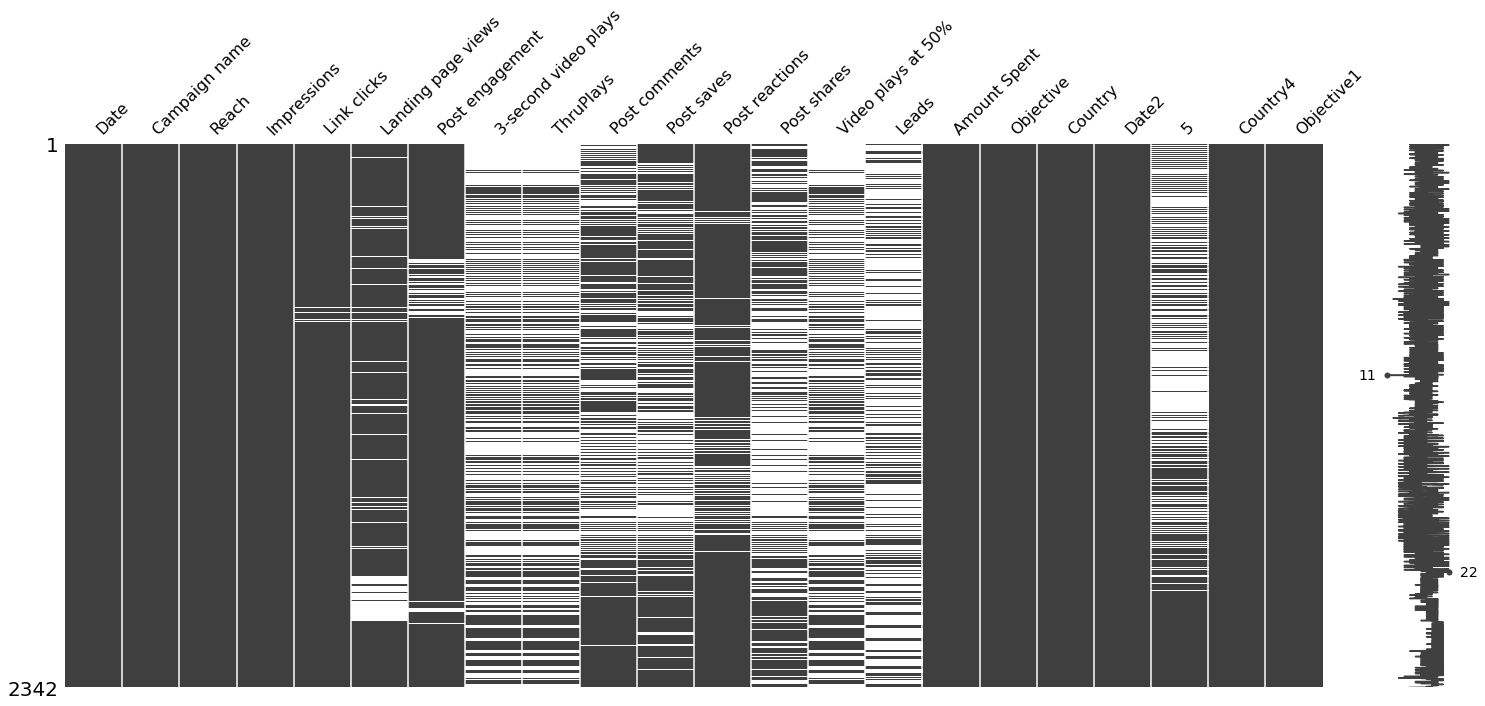

In [1283]:
# Check the data health. The sections should all be completely black indicating the data is complete.
ms.matrix(data)
# It looks good.

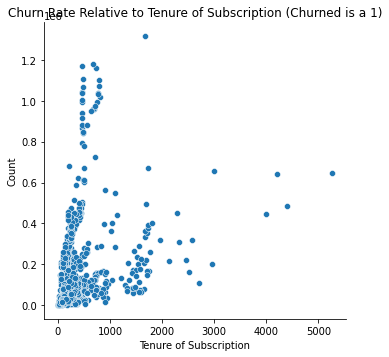

In [1284]:
# Churn rate relative to tenure.
# Stacked bar of tenure and churn.
sns.relplot(x="Amount Spent", y="Reach", data=data, kind='scatter');

plt.ylabel('Count')
plt.xlabel('Tenure of Subscription')
plt.title('Churn Rate Relative to Tenure of Subscription (Churned is a 1)')
plt.show()
# We can clearly see the longer a customer stays as a subscriber, the less they are likely to churn!

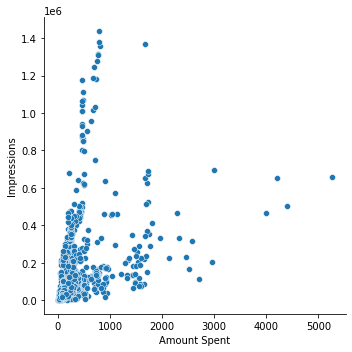

In [1285]:
sns.relplot(x="Amount Spent", y="Impressions", data=data, kind='scatter');


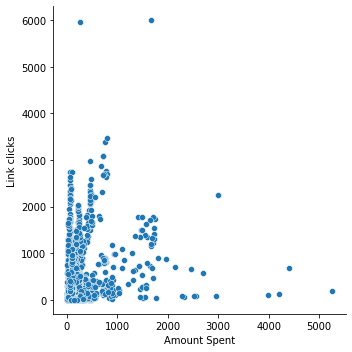

In [1286]:
sns.relplot(x="Amount Spent", y="Link clicks", data=data, kind='scatter');

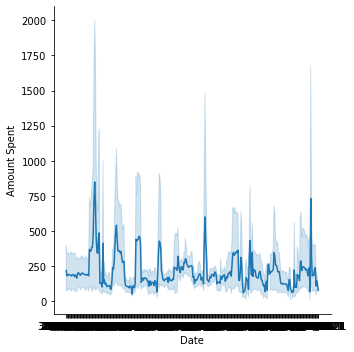

In [1287]:
sns.relplot(x='Date', y='Amount Spent', data=data, kind='line');


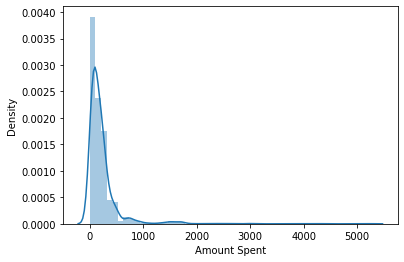

In [1288]:
# Plot the distribution of observations for tenure.
sns.distplot(data['Amount Spent']);
# It shows the max tenure is 70. This must be when the data history ends. We'll account for this in our analysis.

([<matplotlib.patches.Wedge at 0x2531c16e770>,
 [Text(0.8109773930870225, 0.7431794318344508, 'CPMR'),
  Text(-0.5380304048719747, 0.9594390462313378, 'CPC'),
  Text(-1.0995210367719648, -0.03245750600252615, 'CPA'),
  Text(-0.6709050661303346, -0.8717146277542046, 'CPLPV'),
  Text(0.14418834176087725, -1.0905089280240894, 'CPE'),
  Text(0.7835348110268415, -0.7720577698003771, 'CPL'),
  Text(1.05826909732615, -0.30011084226414775, 'Remarketing'),
  Text(1.0997466555890063, -0.02360706506103553, 'CPV')])

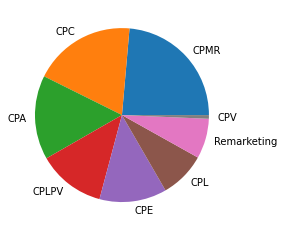

In [1289]:
# Does how a customer pays have to do with their churn?
#pie chart of churn vs. non-churn
plt.pie(data['Objective1'].value_counts(), labels=data['Objective1'].value_counts().index)

#sns.countplot(x='Amount Spent', hue='Objective', data=data, ax=axes[0])
              
#sns.countplot(x='Amount Spent', hue='Country', data=data, ax=axes[1]);
# We can see that customers that use paperless billing are much more likely to churn (0 = don't have paperless billing). That seems backwards I would go check that data with the team.
# We can see that customers that have the 0 payment method (electronic check) are much more likely to churn. Let's discourage that option.

([<matplotlib.patches.Wedge at 0x2531c06a560>,
 [Text(-0.6183160702412895, 0.909772079853723, 'Egypt'),
  Text(0.023606970139518745, -1.099746657626579, 'Qatar'),
  Text(0.8019462220247519, -0.7529158365848254, 'KSA'),
  Text(1.067023147876786, -0.2673230291148048, 'UAE'),
  Text(1.0975267555562327, -0.07372259381091802, 'na')])

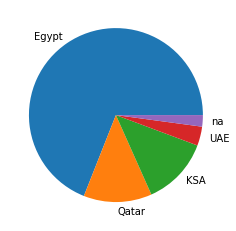

In [1290]:
# See if the other products they have from this company has to do with their churn.
_, axes = plt.subplots(1, sharey=True, figsize=(10, 4)) 
plt.pie(data['Country4'].value_counts(), labels=data['Country4'].value_counts().index)
# If they don't have Phone Service, they are more likely to churn.
# If they don't have Internet Service, they are more likely to churn. Those customers with the highest Internet Service are least likely to churn.
# Conclusion: This makes sense. Customers with other products from the company, and premium products, churn less.
# Offer customers these additional products, perhaps even at a deep discount, so they take them and are less likely to churn. 

<AxesSubplot:>

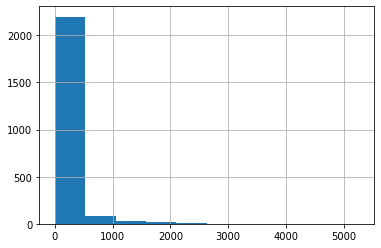

In [1291]:
data["Amount Spent"].hist()

In [1292]:
data.head()

,Date,Campaign name,Reach,Impressions,Link clicks,Landing page views,Post engagement,3-second video plays,ThruPlays,Post comments,...,Post shares,Video plays at 50%,Leads,Amount Spent,Objective,Country,Date2,5,Country4,Objective1
0,31/12/2021,0016_CPE_Egypt_Dec'21,82607,108515,5.0,NaN,3671.0,NaN,NaN,31.0,...,20.0,NaN,NaN,442.86,CPE,Egypt,Dec'21,None,Egypt,CPE
1,31/12/2021,0016_Egypt_CPC_Dec'21,63441,68432,51.0,6.0,3490.0,3397.0,325.0,NaN,...,NaN,565.0,NaN,94.85,Egypt,CPC,Dec'21,None,Egypt,CPC
2,31/12/2021,0016_CPLPV_Egypt_Dec'21,16064,16850,28.0,17.0,50.0,NaN,NaN,1.0,...,3.0,NaN,NaN,72.30,CPLPV,Egypt,Dec'21,None,Egypt,CPLPV
3,31/12/2021,0016_Egypt_Remarketing_Dec'21,18664,21406,12.0,1.0,19.0,NaN,NaN,2.0,...,NaN,NaN,NaN,43.62,Egypt,Remarketing,Dec'21,None,Egypt,Remarketing
4,31/12/2021,0016_CPC_KSA_Dec'21,159934,166541,268.0,105.0,355.0,NaN,NaN,NaN,...,16.0,NaN,NaN,771.16,CPC,KSA,Dec'21,None,KSA,CPC


In [1293]:
data.drop(['Objective', 'Campaign name','Country', 'Date2', '5'], axis = 1, inplace = True)

In [1294]:
data = data.rename(columns={'Country4': 'Country', 'Objective1': 'Objective'})


In [1295]:
data.head()

,Date,Reach,Impressions,Link clicks,Landing page views,Post engagement,3-second video plays,ThruPlays,Post comments,Post saves,Post reactions,Post shares,Video plays at 50%,Leads,Amount Spent,Country,Objective
0,31/12/2021,82607,108515,5.0,NaN,3671.0,NaN,NaN,31.0,7.0,2601.0,20.0,NaN,NaN,442.86,Egypt,CPE
1,31/12/2021,63441,68432,51.0,6.0,3490.0,3397.0,325.0,NaN,3.0,39.0,NaN,565.0,NaN,94.85,Egypt,CPC
2,31/12/2021,16064,16850,28.0,17.0,50.0,NaN,NaN,1.0,1.0,17.0,3.0,NaN,NaN,72.30,Egypt,CPLPV
3,31/12/2021,18664,21406,12.0,1.0,19.0,NaN,NaN,2.0,NaN,5.0,NaN,NaN,NaN,43.62,Egypt,Remarketing
4,31/12/2021,159934,166541,268.0,105.0,355.0,NaN,NaN,NaN,13.0,58.0,16.0,NaN,NaN,771.16,KSA,CPC


In [ ]:
data.to_csv('clean_data.csv')


## Prepare the Data

In [1212]:
# Splitting the data for testing and training.

In [1215]:
train=pd.concat([X_train,y_train],axis=1)

In [ ]:
# Function to estimate the best value of n_estimators and fit the model with the given data.

In [1217]:
import xgboost as xgb

def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        #to get the parameters of xgboost
        xgb_param = alg.get_xgb_params() 
        
        #to convert into a datastructure internally used by xgboost for training efficiency 
        # and speed
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        
        #xgb.cv is used to find the number of estimators required for the parameters 
        # which are set
        cvresult = xgb.cv(xgb_param, xgtrain, 
                          num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                        metrics='auc', early_stopping_rounds=early_stopping_rounds)
        
        #setting the n_estimators parameter using set_params
        alg.set_params(n_estimators=cvresult.shape[0])
        
        print(alg.get_xgb_params())
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Amount Spent'],eval_metric='auc')
    
    return alg

In [ ]:
# Function to get the accuracy of the model on the test data given the features considered.

In [1218]:
def get_accuracy(alg,predictors):
    dtrain_predictions = alg.predict(X_test[predictors])
    dtrain_predprob = alg.predict_proba(X_test[predictors])[:,1]
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y_test.values, 
                                                      dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test.values, 
                                                           dtrain_predprob))

In [ ]:
# Function to get the feature importances based on the model fit.

In [1219]:
def get_feature_importances(alg):
    #to get the feature importances based on xgboost we use fscore
    feat_imp = pd.Series(alg._Booster.get_fscore()).sort_values(ascending=False)
    print(feat_imp)
    
    #this shows the feature importances on a bar chart
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [1233]:
X_rooms = bos.RM
y_price = data["Amount Spent"]


X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_rooms, y_price, test_size = 0.2, random_state=5)


NameError: name 'X_rooms' is not defined

## 7: Model Selection, Predictions, and Metrics

In [ ]:
# To return the XGBClassifier object based on the values of the features.

In [ ]:
# XGBoost converts weak learners to strong learners through an ensemble method. 

In [1221]:
def XgbClass(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,
             gamma=0,subsample=0.8,colsample_bytree=0.8):
    xgb1 = XGBClassifier(learning_rate=learning_rate,
                         n_estimators=n_estimators,
                         max_depth=max_depth,
                         min_child_weight=min_child_weight,
                         gamma=gamma,
                         subsample=subsample,
                         colsample_bytree=colsample_bytree)
    return xgb1

In [ ]:
# Function to return the list of predictors.

In [1222]:
# These are the initial parameters before tuning.
def drop_features(l):
    return [x for x in train.columns if x not in l]

### First Prediction: Use of initial parameters and without feature engineering

In [1223]:
from xgboost import XGBClassifier
import xgboost as xgb

In [1228]:
data.head()

,Date,Campaign name,Reach,Impressions,Link clicks,Landing page views,Post engagement,3-second video plays,ThruPlays,Post comments,...,Post shares,Video plays at 50%,Leads,Amount Spent,Objective,Country,Date2,5,Country4,Objective1
0,31/12/2021,0016_CPE_Egypt_Dec'21,82607,108515,5.0,NaN,3671.0,NaN,NaN,31.0,...,20.0,NaN,NaN,442.86,CPE,Egypt,Dec'21,None,Egypt,CPE
1,31/12/2021,0016_Egypt_CPC_Dec'21,63441,68432,51.0,6.0,3490.0,3397.0,325.0,NaN,...,NaN,565.0,NaN,94.85,Egypt,CPC,Dec'21,None,Egypt,CPC
2,31/12/2021,0016_CPLPV_Egypt_Dec'21,16064,16850,28.0,17.0,50.0,NaN,NaN,1.0,...,3.0,NaN,NaN,72.30,CPLPV,Egypt,Dec'21,None,Egypt,CPLPV
3,31/12/2021,0016_Egypt_Remarketing_Dec'21,18664,21406,12.0,1.0,19.0,NaN,NaN,2.0,...,NaN,NaN,NaN,43.62,Egypt,Remarketing,Dec'21,None,Egypt,Remarketing
4,31/12/2021,0016_CPC_KSA_Dec'21,159934,166541,268.0,105.0,355.0,NaN,NaN,NaN,...,16.0,NaN,NaN,771.16,CPC,KSA,Dec'21,None,KSA,CPC


In [1230]:
data['Amount Spent'].apply(lambda x: float(x))


0        442.86
1         94.85
2         72.30
3         43.62
4        771.16
          ...  
33318     85.11
33319    205.48
33416     75.53
33417    157.10
33515     79.12
Name: Amount Spent, Length: 2342, dtype: float64

In [1231]:
predictors = drop_features([target, IDcol])
xgb1=XgbClass()
first_model=modelfit(xgb1, train, predictors)
xgb1.fit(train[predictors],train['Amount Spent'])

ValueError: could not convert string to float: '5/3/2021'

In [1232]:
get_accuracy(first_model,predictors)

NameError: name 'first_model' is not defined

**Accuracy** is the proportion of true positives and negatives in the whole data set. It determines if a value is accurate compare it to the accepted value; the nearness of a calculation to the true value.

**AUC** (area under the ROC receiver operating characteristic curve) measures how true positive rate (recall) and false positive rate trade off, so in that sense it is already measuring something else. More importantly, AUC is not a function of threshold. It is an evaluation of the classifier as threshold varies over all possible values. It is in a sense a broader metric, testing the quality of the internal value that the classifier generates and then compares to a threshold. 

**Accuracy vs AUC**: The accuracy depends on the threshold chosen, whereas the AUC considers all possible thresholds. Because of this it is often preferred as it provides a “broader” view of the performance of the classifier, but they still measure different things and as such using one or the other is problem-dependent.

MonthlyCharges      270
tenure              195
PaymentMethod        58
Contract             57
InternetService      42
OnlineBackup         39
StreamingTV          26
PaperlessBilling     26
OnlineSecurity       25
SeniorCitizen        24
TechSupport          23
Partner              20
PhoneService         18
MultipleLines        18
StreamingMovies      16
gender               16
Dependents           16
DeviceProtection     12
dtype: int64


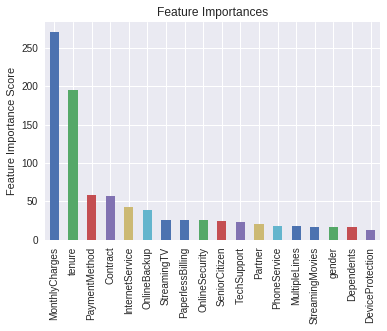

In [ ]:
get_feature_importances(first_model)

### Second Prediction: Using intial Parameters and removing features of least importances

In [ ]:
# Model after removing the features of least importance.

In [ ]:
dropl=['DeviceProtection','Dependents','Dependents','gender','StreamingMovies','MultipleLines']

In [ ]:
dropl_first=dropl+[target,IDcol]

In [ ]:
# These are the initial parameters before tuning.
predictors = drop_features(dropl_first)
xgb1 = XgbClass()
second_model=modelfit(xgb1, train, predictors)

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': None, 'n_estimators': 35, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'silent': 1, 'subsample': 0.8}


In [ ]:
get_accuracy(second_model,predictors)


Model Report
Accuracy : 0.8069
AUC Score (Train): 0.847366


MonthlyCharges      289
tenure              190
PaymentMethod        87
Contract             63
InternetService      57
SeniorCitizen        38
PaperlessBilling     35
StreamingTV          30
OnlineSecurity       29
TechSupport          28
OnlineBackup         28
PhoneService         26
Partner              26
dtype: int64


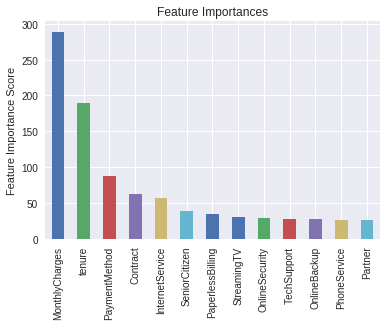

In [ ]:
get_feature_importances(second_model)

### Third Prediction: Again removing the features of least importance

In [ ]:
dropl1=dropl+['Partner','PhoneService','OnlineBackup','TechSupport','OnlineSecurity']
dropl_second=dropl_first+['Partner','PhoneService','OnlineBackup','TechSupport','OnlineSecurity']

In [ ]:
predictors=drop_features(dropl_second)

In [ ]:
xgb1=XgbClass()
third_model=modelfit(xgb1,train,predictors)

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': None, 'n_estimators': 50, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'silent': 1, 'subsample': 0.8}


In [ ]:
get_accuracy(third_model,predictors)


Model Report
Accuracy : 0.7984
AUC Score (Train): 0.843116


## 8: Predict on New Cases

In [ ]:
# Function stores the result in required csv file and features. I removed this section for now as the csv files are not yet saving correctly. See prototype version of notebook for details.

## 9: Tuning

In [ ]:
# Tune max_depth and min_child_weight.

In [ ]:
predictors = drop_features(dropl_first)
predictors

['SeniorCitizen',
 'Partner',
 'tenure',
 'PhoneService',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'TechSupport',
 'StreamingTV',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges']

In [ ]:
param_test1 = {
 'max_depth':list(range(5,10,1)),
 'min_child_weight':list(range(5,10,1))
}
gsearch1 = GridSearchCV(estimator=XgbClass(n_estimators=48),param_grid =param_test1,
                        scoring='roc_auc',n_jobs=-1,iid=False, cv=5, verbose=3)
gsearch1.fit(train[predictors],train[target])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   21.5s finished


({'mean_fit_time': array([0.20724802, 0.20932374, 0.20880656, 0.20871305, 0.21010675,
         0.24907684, 0.25009632, 0.24860916, 0.24591808, 0.24454684,
         0.28334703, 0.28474541, 0.28169541, 0.28036094, 0.27825117,
         0.31879997, 0.31600304, 0.31035895, 0.30742917, 0.3038981 ,
         0.34530797, 0.33879218, 0.3390099 , 0.32813511, 0.31488495]),
  'mean_score_time': array([0.00653849, 0.00614457, 0.00613132, 0.00614538, 0.00614262,
         0.00677257, 0.00668726, 0.00675406, 0.00672469, 0.00657935,
         0.00738587, 0.00716372, 0.0071681 , 0.00734129, 0.006917  ,
         0.00756946, 0.00752988, 0.00749302, 0.00734549, 0.00724516,
         0.00789227, 0.00772715, 0.00758004, 0.00755405, 0.00721326]),
  'mean_test_score': array([0.84350596, 0.84539506, 0.84513634, 0.84523376, 0.84500423,
         0.84303827, 0.84317968, 0.84321582, 0.84356301, 0.84444605,
         0.84189866, 0.84086484, 0.84214285, 0.84234019, 0.84326609,
         0.83943562, 0.84043105, 0.84044683,

In [ ]:
# If the best parameters are edge values then we do 
# GridSearchCV by taking one less and one value more than the best parameters.

In [ ]:
param_test2 = {
 'max_depth':[6,7,8,9],
 'min_child_weight':[2,3,4,5]
}
gsearch2 = GridSearchCV(estimator=XgbClass(n_estimators=48),param_grid =param_test2,scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([0.25651345, 0.24808664, 0.25345564, 0.24944706, 0.28951616,
         0.28822298, 0.28571844, 0.28517208, 0.32676215, 0.32411208,
         0.32022843, 0.31513767, 0.36551666, 0.35565701, 0.34868417,
         0.3419539 ]),
  'mean_score_time': array([0.00697908, 0.00703349, 0.00803852, 0.00803237, 0.00733232,
         0.00735245, 0.00715566, 0.00723968, 0.00774646, 0.00772562,
         0.00789828, 0.00892334, 0.00814891, 0.00829682, 0.0079906 ,
         0.00785379]),
  'mean_test_score': array([0.84042715, 0.84189787, 0.8428498 , 0.84303827, 0.8398022 ,
         0.83976764, 0.84035653, 0.84189866, 0.83624953, 0.8369503 ,
         0.83858558, 0.83943562, 0.83412339, 0.83550116, 0.83753711,
         0.83793307]),
  'mean_train_score': array([0.91253411, 0.90805523, 0.90370692, 0.90002083, 0.93031609,
         0.92219569, 0.9160066 , 0.91041047, 0.94335466, 0.93313675,
         0.92526439, 0.91758409, 0.95263699, 0.94049106, 0.93067881,
         0.92202018]),
  'pa

In [ ]:
xgb1 = XgbClass(max_depth=8,min_child_weight=4)
model=modelfit(xgb1, train, predictors)

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 8, 'min_child_weight': 4, 'missing': None, 'n_estimators': 20, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'silent': 1, 'subsample': 0.8}


In [ ]:
get_accuracy(model,predictors)


Model Report
Accuracy : 0.7979
AUC Score (Train): 0.843505


In [ ]:
# To tune gamma.

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,8)]
}
gsearch3=GridSearchCV(estimator=XgbClass(n_estimators=48,max_depth=7,min_child_weight=5),
                      param_grid =param_test3,scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([0.28967605, 0.28326716, 0.28377404, 0.28291426, 0.28900743,
         0.29015837, 0.29366841, 0.28920174]),
  'mean_score_time': array([0.00724435, 0.00734229, 0.00721374, 0.0086863 , 0.00774436,
         0.007374  , 0.00738888, 0.00745301]),
  'mean_test_score': array([0.84189866, 0.84089109, 0.84198526, 0.84263784, 0.8409183 ,
         0.8416148 , 0.84014798, 0.84140207]),
  'mean_train_score': array([0.91041047, 0.91040467, 0.91002945, 0.90957837, 0.90951727,
         0.90899937, 0.90847181, 0.9084777 ]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4},
   {'gamma': 0.5},
   {'gamma': 0.6},
   {'gamma': 0.7}],
  'rank_test_score': array([3, 7, 2, 1, 6, 4, 8, 5], dtype=int32),
  'split0_test_score':

In [ ]:
xgb1 = XgbClass(max_depth=7,min_child_weight=5,gamma=0)
model=modelfit(xgb1, train, predictors)

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 7, 'min_child_weight': 5, 'missing': None, 'n_estimators': 20, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'silent': 1, 'subsample': 0.8}


In [ ]:
get_accuracy(model,predictors)


Model Report
Accuracy : 0.8027
AUC Score (Train): 0.844282


In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4=GridSearchCV(estimator=XgbClass(n_estimators=48,max_depth=7,
                                         min_child_weight=5,gamma=0),
                      param_grid =param_test4,scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([0.24761925, 0.24028883, 0.23841305, 0.23658376, 0.27860475,
         0.27579222, 0.27358937, 0.25988464, 0.28870115, 0.28766732,
         0.28121572, 0.27407904, 0.304284  , 0.30221763, 0.29781356,
         0.28894463]),
  'mean_score_time': array([0.00745382, 0.00756383, 0.00910616, 0.00766773, 0.00748549,
         0.00750766, 0.00747414, 0.00724821, 0.00714731, 0.00728402,
         0.00721726, 0.00721107, 0.00716071, 0.00730948, 0.00833058,
         0.00849657]),
  'mean_test_score': array([0.84051166, 0.84041769, 0.84022394, 0.84168989, 0.83987525,
         0.84008881, 0.84050073, 0.84057328, 0.84029717, 0.83995671,
         0.84189866, 0.83927434, 0.83927259, 0.83936597, 0.84106022,
         0.83889594]),
  'mean_train_score': array([0.89651826, 0.90120841, 0.90492691, 0.90857003, 0.89975845,
         0.90490393, 0.90868614, 0.91178254, 0.90200789, 0.90601781,
         0.91041047, 0.91265981, 0.90269874, 0.90713974, 0.91118315,
         0.91401333]),
  'pa

In [ ]:
xgb1 = XgbClass(max_depth=8,min_child_weight=4,gamma=0.4,subsample=0.8,colsample_bytree=0.6)
model=modelfit(xgb1, train, predictors)

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 0.6, 'gamma': 0.4, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 8, 'min_child_weight': 4, 'missing': None, 'n_estimators': 18, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'silent': 1, 'subsample': 0.8}


In [ ]:
get_accuracy(model,predictors)


Model Report
Accuracy : 0.7979
AUC Score (Train): 0.843383


In [ ]:
#dropl1=dropl+['Partner','PhoneService','OnlineBackup','TechSupport','OnlineSecurity']
# RunTestAndSaveResults(dropl,'final_result.csv',model)
#FixMeLater the final_result file is not printing to csv

Next Steps
* Run some actual data from your company. For case study purposes, let's keep going with dummy data ...
* After some initial analysis, cleaning, and tuning we're consistently getting an accuracy of 80% and AUC ~84%. Feature engineering and tuning did not improve (in some cases made worse, seems to be overfitting).
* This meets our prediction success threshold of 80%.
* Share findings with team. 
* Discuss some possible next steps:
    * Get more data. This is only ~3k records after cleaning.

      
  * **Get more detailed data on features that are showing to be relatively LESS predictive but our analysis show with more details they could be really useful**
